### Orbit of a Test Particle in Newtonian Gravity

In Spherical polar coordinates, if the position of a test particle is given by $(r,\theta,\phi)$, we can orient the coordinate axes so that the particle remains inside the $x-y$ plane. The Lagrangian, $\mathcal{L}$ is then given by :

$$ \mathcal{L}=T-V=\dfrac{1}{2}mv^2+\dfrac{GMm}{r}=\dfrac{1}{2}m(\dot{r}^2+r^2\dot{\phi}^2)+\dfrac{GMm}{r} $$

Using Euler-Lagrange equations, we get the equations : 

$$ \dfrac{d}{dt}(r^2\dot\phi)=0 $$
$$ \ddot{r}=r\dot\phi^2-\dfrac{GM}{r^2} $$

The first equation gives us a constant of motion, $L=r^2\dot\phi$. Using this, the second equation can be modified as :

$$ r''=r-\dfrac{GMr^2}{L^2} $$

, where $r'=dr/d\phi$ and $r''=d^2r/d\phi^2$

For the purpose of solving the above Second Order ODE, we construct two First Order ODEs as follows :

$$ r'=v $$
$$ v'=r-\dfrac{GMr^2}{L^2} $$

In matrix form, these become : 

$$ \dfrac{d}{d\phi}\begin{pmatrix}r\\ v \end{pmatrix}=\begin{pmatrix}v\\ r-\frac{GMr^2}{L^2} \end{pmatrix} $$

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
# Defining the Physical Constants

G = 6.67*10**-11                    # Universal Gravitational Constant
M = 2*10**30                        # Mass of Sun
AU = 1.496*10**11                   # Astronomical Unit (A.U.)
L_earth = 4.4536*10**15             # Angular momentum of Earth per unit mass
L_mercury = 2.7701*10**15             # Angular momentum of Mercury per unit mass
merc_perihelion = 0.307499*AU

In [146]:
# Initial Conditions

# For Earth : 

# r0 = 1*AU                           # Initial Radial Position
# v0 = 0                              # Initial Radial Velocity
# y_ini = np.array([r0,v0])
# L = 1*L_earth                       # Angular momentum per unit mass

# For Other planets

r0 = merc_perihelion                            # Initial Radial Position
v0 = 0                                      # Initial Radial Velocity
y_ini = np.array([r0,v0])
L = 1*L_mercury                           # Angular momentum per unit mass


# Time step

h = 0.001

In [147]:
# Defining the derivative function
# Here x = angular coordinate (phi)
# and y = [r, v]

def ddx(x,y):
    return np.array([y[1],y[0]-G*M*(y[0])**2/L**2])

In [148]:
# Defining the rk4 method

def rk4(f,x,y,h):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

In [149]:
# Defining the Caller Function

def Caller(mtd,f,xs,y_ini,h):
    N = len(xs)
    y = y_ini
    ys = np.zeros((N,2),float)
    for i in range(N):
        x = xs[i]
        ys[i] = y
        y = mtd(ddx,x,y,h)
    return ys

In [150]:
# Getting a solution

n = 3                                        # Number of revolutions
xs = np.arange(0,2*np.pi*n+h,h)              # Stores the angular coordinates
ys = Caller(rk4,ddx,xs,y_ini,h)              # Stores the radial coordinates and radial velocities

r = ys[:,0]                                  # Stores just the radial coordinates
r = r/(1*AU)                                 # Normalizes the radial distance w.r.t. 1 A.U.

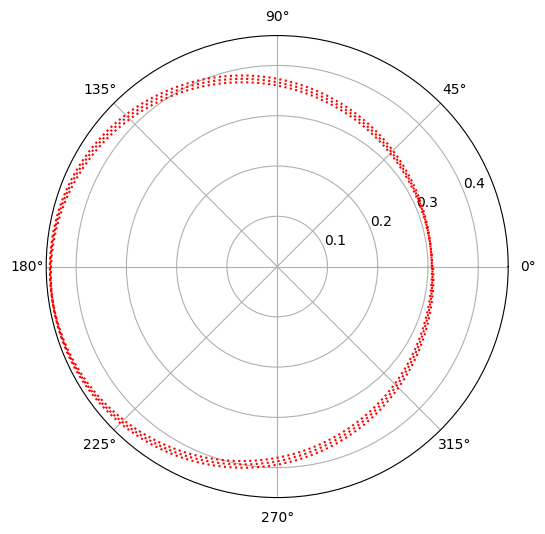

In [151]:
# Visualizing the Polar Plot

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar = True)
ax.plot(xs,r,linestyle = "dotted",c = "red")
plt.show()


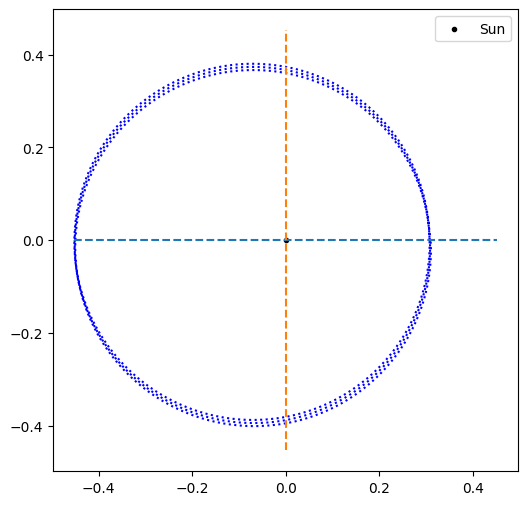

In [152]:
# In Cartesian Coodinates

x_ax = np.zeros((len(r),),float)
y_ax = np.zeros((len(r),),float)

l = 0

for i in range(len(r)):
    x_ax[i]=r[i]*np.cos(xs[i])
    y_ax[i]=r[i]*np.sin(xs[i])
    if l<abs(x_ax[i]):
        l=abs(x_ax[i])
    if l<abs(y_ax[i]):
        l=abs(y_ax[i])


plt.figure(figsize=(6,6))
plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted')
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.legend()
plt.show()